In [1]:
is_notebook = True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

In [3]:
if is_notebook:
    %matplotlib widget

In [4]:
# the svg format figure will not render text as paths, but embed the font as text
plt.rcParams['svg.fonttype'] = 'none'

# change default font for all plots
plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


# change other settings to ease the work in Adobe Illustrator
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad']= 6 # spacing between axes to x ticks, this also includes spacing between label and ticks
plt.rcParams['ytick.major.pad']= 6 # spacing between axes to y ticks
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.labelsize'] = 14

In [5]:
data_path = './Experiment_data/'
data_file = 'Comb_9_lines.csv'
save_to_path = './Experiment_results/'

df = pd.read_csv(data_path+data_file,
        header=None, delimiter="\t", decimal=",")

wavelength = df[0].to_numpy()
power = df[1].to_numpy()

In [6]:
# remove redundancy measures (interpolations by the OSA)
new_wavelength = []
ind_wavelength = []
ind = 0
for i in wavelength:
    if i not in new_wavelength:
        ind_wavelength.append(ind)
        new_wavelength.append(i)
    ind+=1

new_power = power[ind_wavelength]

Text(0, 0.5, 'Power (dBm)')

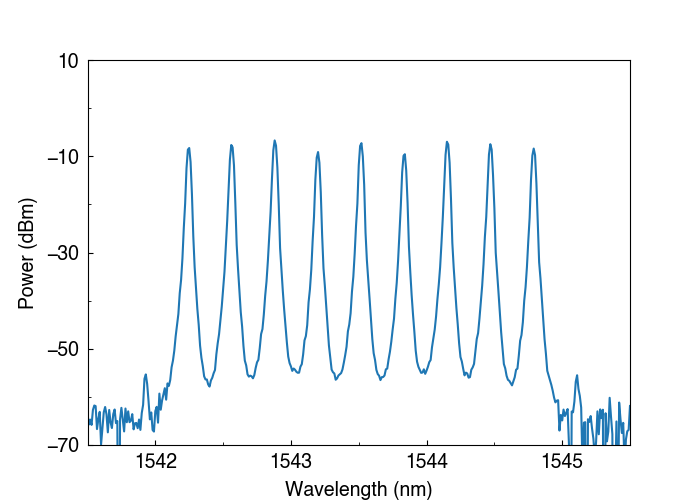

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches((7, 5))
ax.plot(new_wavelength, new_power)
ax.axis([1541.5, 1545.5, -70, 10])
ax.set_xticks(np.arange(1542, 1546, 1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_yticks(np.arange(-70, 20, 20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Power (dBm)')

In [8]:
fig.savefig(save_to_path+'Figure4c.svg', format='svg', dpi=600)